In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Normal Distribution: Coin Flips

In [4]:
def heads_tails(number_of_flips):
    tails_count = 0
    heads_count = 0
    for i in range(number_of_flips):
        rand = random.randint(0, 1)
        if rand == 1:
            tails_count += 1
        else:
            heads_count += 1
            
    print('Total Flips: {0:10}, Tails: {1:10}, Heads: {2:10}'.format(number_of_flips, tails_count, heads_count))
    return (heads_count/number_of_flips)*100

In [5]:
flips = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000, 2000, 10000, 100000]
[heads_tails(a) for a in flips]

Total Flips:          1, Tails:          0, Heads:          1
Total Flips:          2, Tails:          1, Heads:          1
Total Flips:          5, Tails:          1, Heads:          4
Total Flips:         10, Tails:          7, Heads:          3
Total Flips:         25, Tails:         16, Heads:          9
Total Flips:         50, Tails:         16, Heads:         34
Total Flips:        100, Tails:         44, Heads:         56
Total Flips:        200, Tails:        106, Heads:         94
Total Flips:        500, Tails:        233, Heads:        267
Total Flips:       1000, Tails:        491, Heads:        509
Total Flips:       2000, Tails:        996, Heads:       1004
Total Flips:      10000, Tails:       4958, Heads:       5042
Total Flips:     100000, Tails:      49740, Heads:      50260


[100.0,
 50.0,
 80.0,
 30.0,
 36.0,
 68.0,
 56.00000000000001,
 47.0,
 53.400000000000006,
 50.9,
 50.2,
 50.42,
 50.260000000000005]

### Normal Distribution: Throw Dice

In [6]:
def dice_throw(number_of_throws):
    face_of_the_dice = [0, 0, 0, 0, 0, 0]
    for i in range(number_of_throws):
        rand = random.randint(1, 6)
        face_of_the_dice[rand-1] += 1
            
    print('Total Throws: {0:8}, 1s: {1:8}, 2s: {2:8}, 3s: {3:8}, 4s: {4:8}, 5s: {5:8}, 6s: {6:8}'.format(number_of_throws, face_of_the_dice[0], face_of_the_dice[1], face_of_the_dice[2], face_of_the_dice[3], face_of_the_dice[4], face_of_the_dice[5]))
    return '1s: {0:8}, 2s: {1:8}, 3s: {2:8}, 4s: {3:8}, 5s: {4:8}, 6s: {5:8}'.format(face_of_the_dice[0]/number_of_throws, face_of_the_dice[1]/number_of_throws, face_of_the_dice[2]/number_of_throws, face_of_the_dice[3]/number_of_throws, face_of_the_dice[4]/number_of_throws, face_of_the_dice[5]/number_of_throws)

In [7]:
flips = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000, 2000, 10000, 100000]
[dice_throw(a) for a in flips]

Total Throws:        1, 1s:        1, 2s:        0, 3s:        0, 4s:        0, 5s:        0, 6s:        0
Total Throws:        2, 1s:        0, 2s:        1, 3s:        1, 4s:        0, 5s:        0, 6s:        0
Total Throws:        5, 1s:        0, 2s:        0, 3s:        1, 4s:        0, 5s:        3, 6s:        1
Total Throws:       10, 1s:        3, 2s:        1, 3s:        2, 4s:        0, 5s:        2, 6s:        2
Total Throws:       25, 1s:        7, 2s:        9, 3s:        4, 4s:        0, 5s:        3, 6s:        2
Total Throws:       50, 1s:        7, 2s:        7, 3s:       10, 4s:       10, 5s:        5, 6s:       11
Total Throws:      100, 1s:       11, 2s:       21, 3s:       23, 4s:       14, 5s:       18, 6s:       13
Total Throws:      200, 1s:       33, 2s:       34, 3s:       41, 4s:       29, 5s:       25, 6s:       38
Total Throws:      500, 1s:       84, 2s:       85, 3s:       86, 4s:       75, 5s:       97, 6s:       73
Total Throws:     1000, 1s:      167,

['1s:      1.0, 2s:      0.0, 3s:      0.0, 4s:      0.0, 5s:      0.0, 6s:      0.0',
 '1s:      0.0, 2s:      0.5, 3s:      0.5, 4s:      0.0, 5s:      0.0, 6s:      0.0',
 '1s:      0.0, 2s:      0.0, 3s:      0.2, 4s:      0.0, 5s:      0.6, 6s:      0.2',
 '1s:      0.3, 2s:      0.1, 3s:      0.2, 4s:      0.0, 5s:      0.2, 6s:      0.2',
 '1s:     0.28, 2s:     0.36, 3s:     0.16, 4s:      0.0, 5s:     0.12, 6s:     0.08',
 '1s:     0.14, 2s:     0.14, 3s:      0.2, 4s:      0.2, 5s:      0.1, 6s:     0.22',
 '1s:     0.11, 2s:     0.21, 3s:     0.23, 4s:     0.14, 5s:     0.18, 6s:     0.13',
 '1s:    0.165, 2s:     0.17, 3s:    0.205, 4s:    0.145, 5s:    0.125, 6s:     0.19',
 '1s:    0.168, 2s:     0.17, 3s:    0.172, 4s:     0.15, 5s:    0.194, 6s:    0.146',
 '1s:    0.167, 2s:    0.184, 3s:    0.169, 4s:    0.144, 5s:    0.166, 6s:     0.17',
 '1s:   0.1615, 2s:    0.175, 3s:    0.165, 4s:   0.1575, 5s:     0.17, 6s:    0.171',
 '1s:   0.1634, 2s:   0.1647, 3s:   0.1733,

### n Coin Flips

In [52]:
NUM_COINS = 15
PROBABILITY = 0.25

In [53]:
def coin_flip(no_of_coins, probability):
    flips = [1 if(random.random() < probability) else 0 for flip in range(no_of_coins)]
    return flips

In [54]:
def n_coin_flip(n_coin):
    return [coin_flip(n_coin, PROBABILITY) for i in range(2**n_coin)]

In [55]:
flip_series = n_coin_flip(NUM_COINS)
df_flips = pd.DataFrame(flip_series, columns=['C'+str(i+1) for i in range(NUM_COINS)])

In [56]:
df_flips

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15
0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0
9,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0


In [57]:
df_flips["Head Count"] = df_flips.sum(axis=1)

In [58]:
df_flips

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Head Count
0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,3
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,3
4,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,5
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,5
9,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,5


In [59]:
data = pd.DataFrame(df_flips["Head Count"].value_counts())
data

,Head Count
4,7401
3,7341
5,5418
2,5066
6,3083
1,2152
7,1268
0,458
8,435
9,125


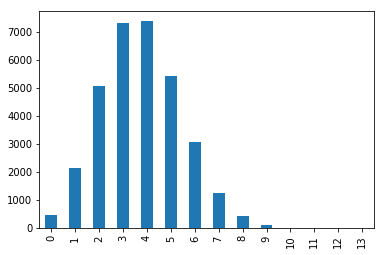

In [60]:
data["Head Count"].sort_index().plot(kind="bar")

In [61]:
data["Head Count"].sort_index()

0      458
1     2152
2     5066
3     7341
4     7401
5     5418
6     3083
7     1268
8      435
9      125
10      14
11       5
12       1
13       1
Name: Head Count, dtype: int64

### n Coin n Flips



In [62]:
NUM_FLIPS = 100

In [63]:
def flip_series():
    flip_series = n_coin_flip(NUM_COINS)
    df_flips = pd.DataFrame(flip_series, columns=['C'+str(i+1) for i in range(NUM_COINS)])
    return pd.DataFrame(df_flips.sum(axis=1).value_counts().sort_index())

In [64]:
series = pd.DataFrame()
for i in range(NUM_FLIPS):
    this_series = flip_series()
    series["I"+str(i+1)] = this_series[0]

In [65]:
series.fillna(value=0)

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I91,I92,I93,I94,I95,I96,I97,I98,I99,I100
0,456,421.0,454.0,455.0,437.0,456,454,418,421.0,415,...,448.0,429,437.0,438,406.0,476.0,417.0,421.0,439.0,461
1,2110,2189.0,2121.0,2132.0,2239.0,2210,2276,2134,2124.0,2271,...,2192.0,2204,2178.0,2169,2176.0,2158.0,2188.0,2233.0,2156.0,2112
2,5092,5008.0,5099.0,5167.0,5062.0,5046,5065,5167,5177.0,5064,...,5098.0,4995,5112.0,5098,5107.0,5184.0,5156.0,4915.0,5106.0,5124
3,7310,7407.0,7424.0,7403.0,7335.0,7253,7255,7440,7453.0,7256,...,7388.0,7288,7479.0,7505,7388.0,7342.0,7391.0,7292.0,7341.0,7428
4,7300,7394.0,7405.0,7363.0,7452.0,7404,7548,7496,7251.0,7535,...,7354.0,7391,7323.0,7459,7351.0,7355.0,7412.0,7518.0,7418.0,7399
5,5520,5544.0,5407.0,5337.0,5456.0,5452,5384,5365,5453.0,5419,...,5513.0,5446,5364.0,5208,5491.0,5436.0,5358.0,5452.0,5414.0,5428
6,3103,2988.0,2972.0,2975.0,2975.0,3106,2944,2986,2959.0,2989,...,2890.0,3034,2992.0,3014,3059.0,2971.0,3026.0,3056.0,3011.0,2984
7,1315,1278.0,1323.0,1394.0,1266.0,1310,1302,1225,1306.0,1250,...,1281.0,1390,1304.0,1281,1256.0,1320.0,1280.0,1339.0,1319.0,1235
8,412,397.0,419.0,423.0,407.0,405,406,400,490.0,437,...,445.0,439,436.0,456,419.0,393.0,401.0,414.0,422.0,438
9,112,113.0,120.0,100.0,118.0,107,110,105,116.0,109,...,133.0,119,115.0,113,88.0,107.0,111.0,93.0,107.0,131


In [66]:
series.columns
mean_of_series = pd.DataFrame(series.mean(axis=1))
mean_of_series

,0
0,439.740000
1,2186.730000
2,5103.480000
3,7378.330000
4,7380.670000
5,5411.350000
6,3011.220000
7,1289.290000
8,427.900000
9,113.060000


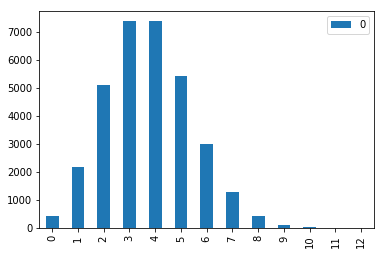

In [67]:
mean_of_series.plot(kind="bar")

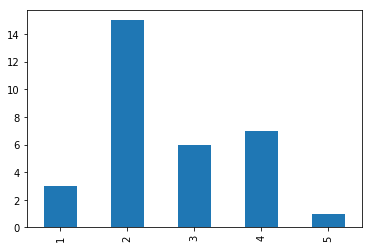

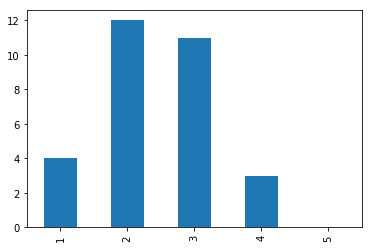

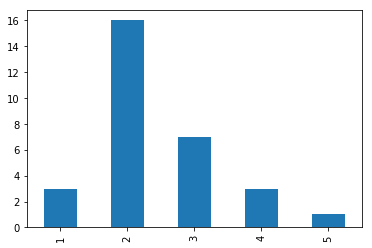

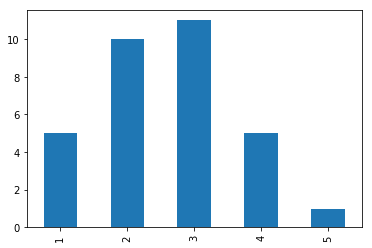

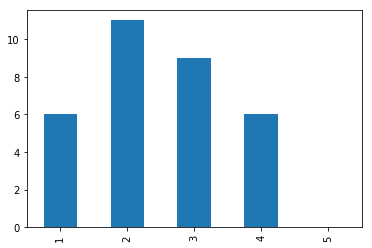

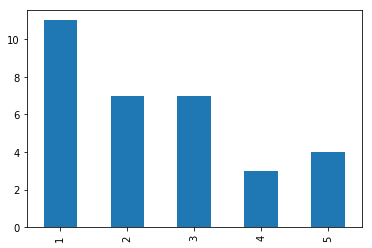

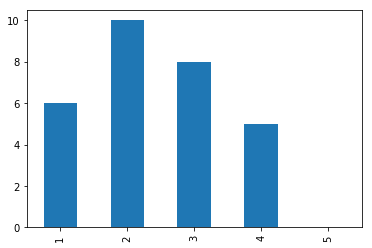

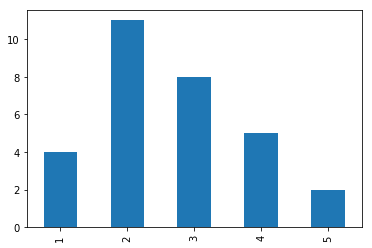

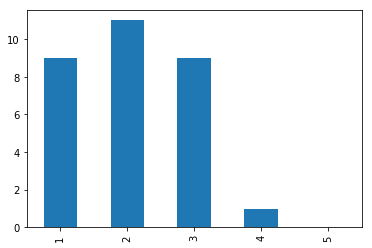

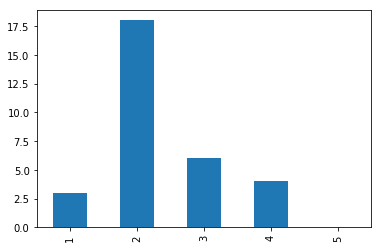

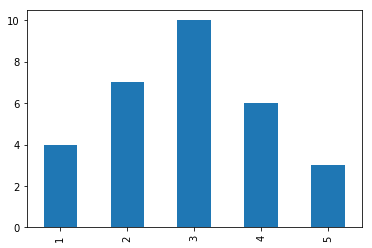

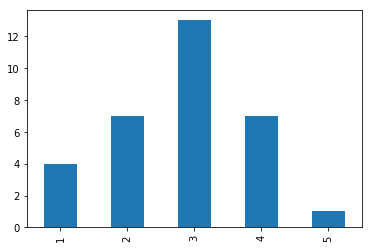

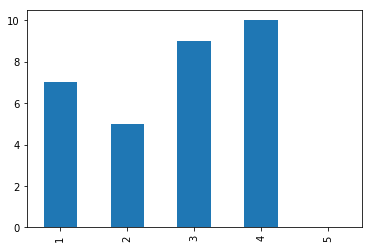

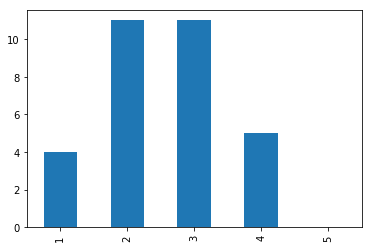

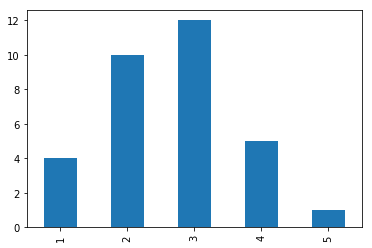

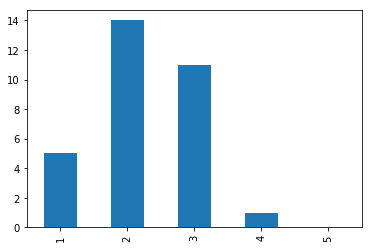

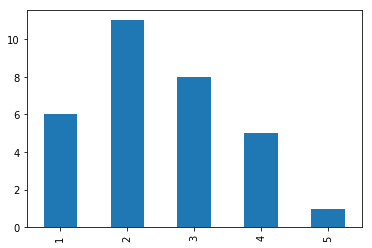

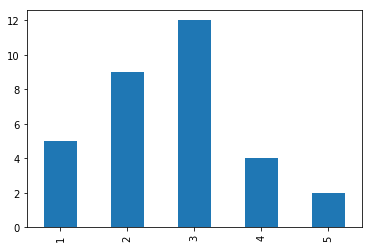

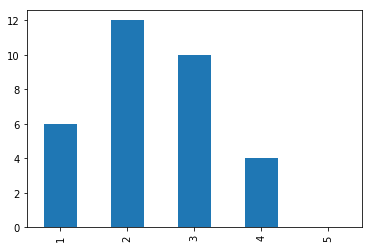

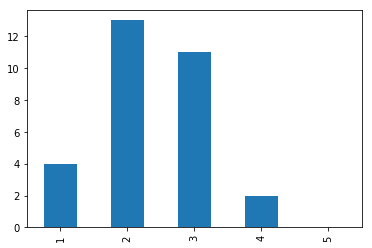

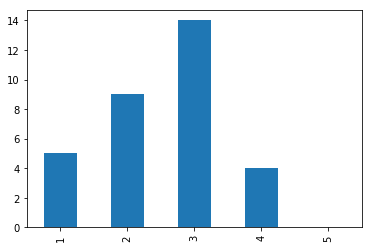

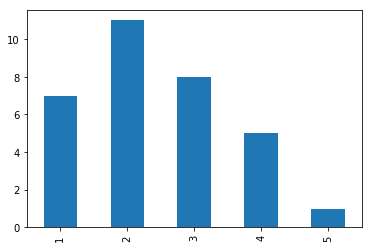

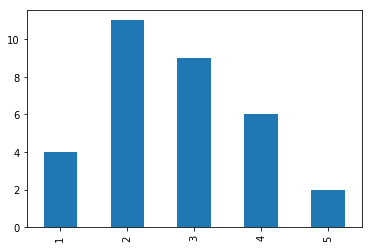

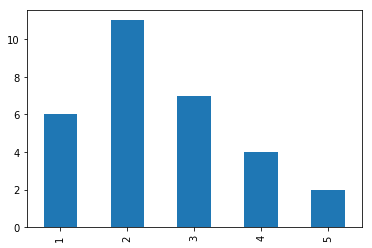

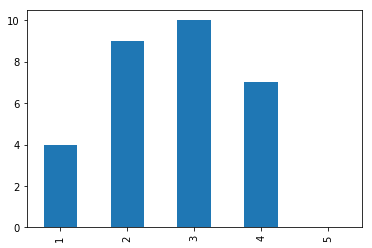

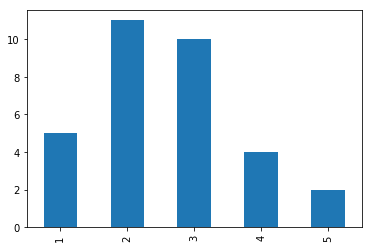

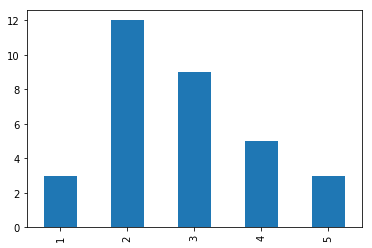

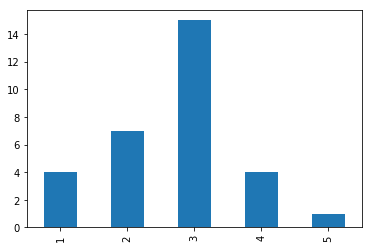

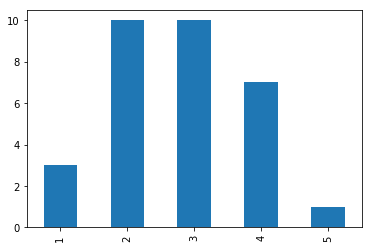

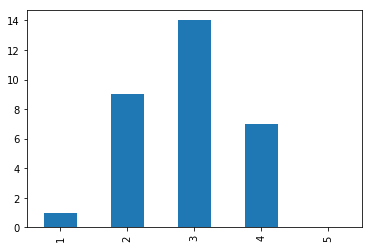

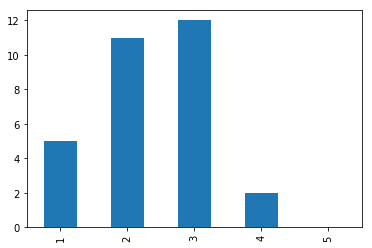

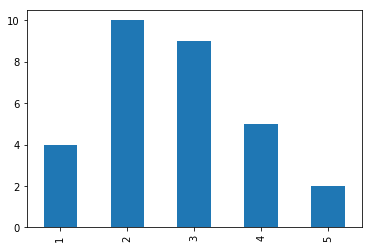

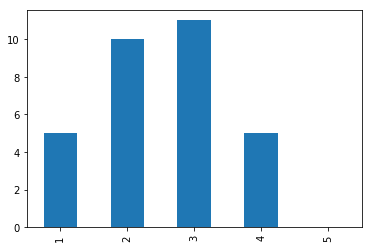

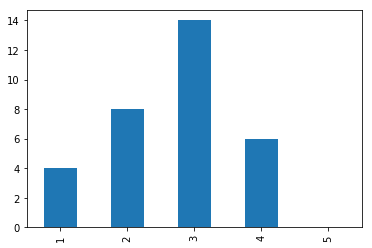

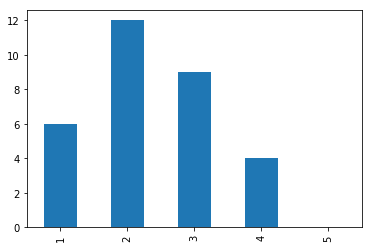

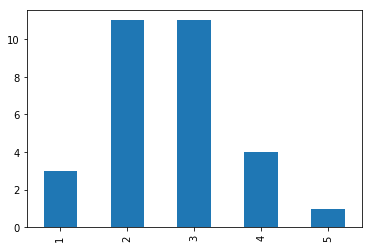

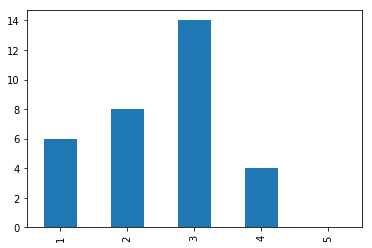

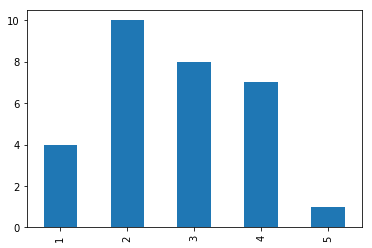

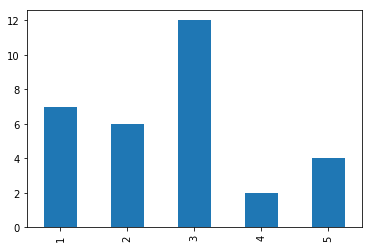

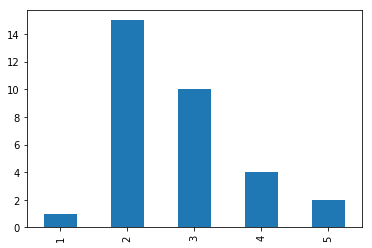

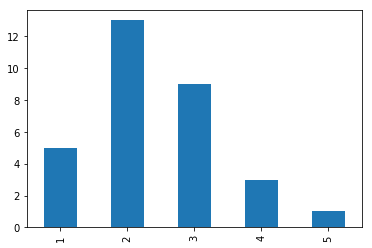

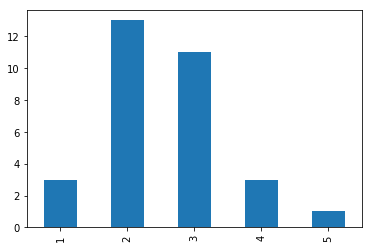

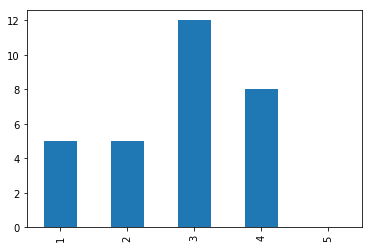

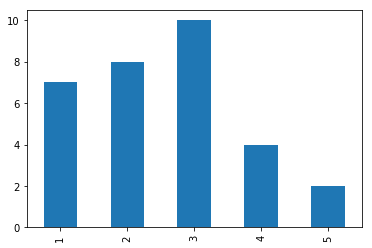

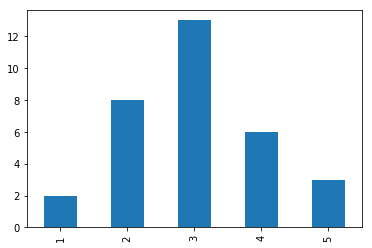

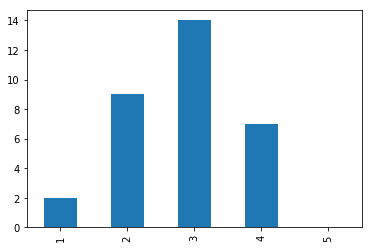

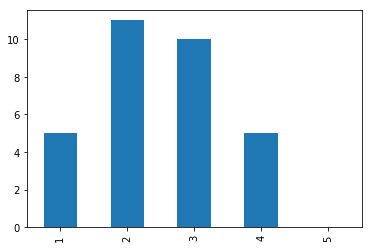

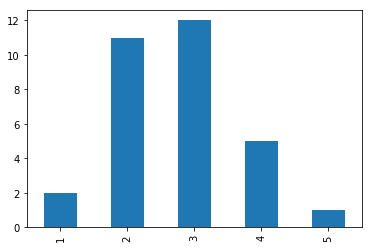

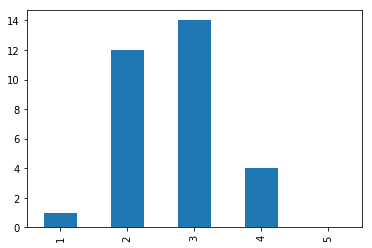

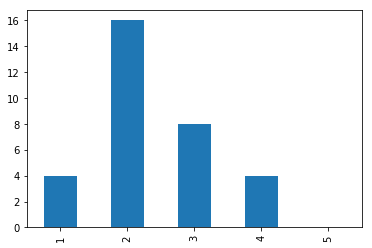

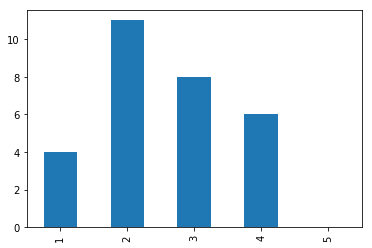

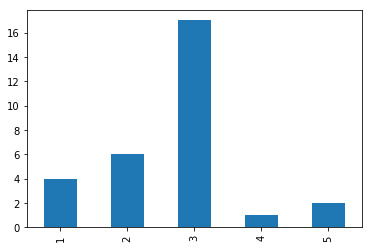

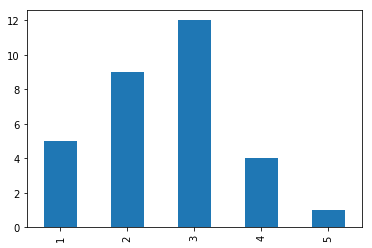

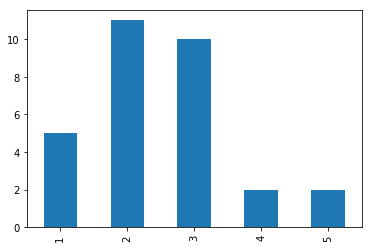

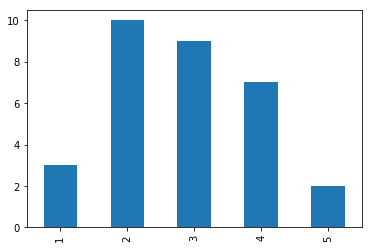

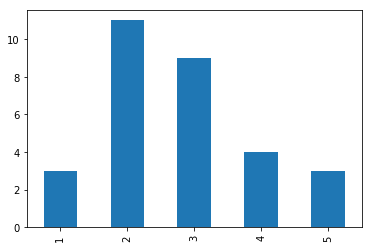

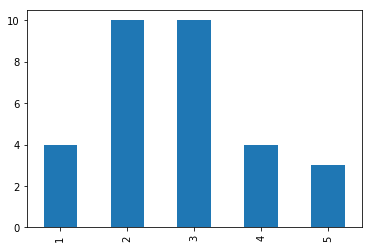

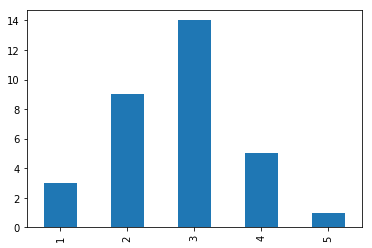

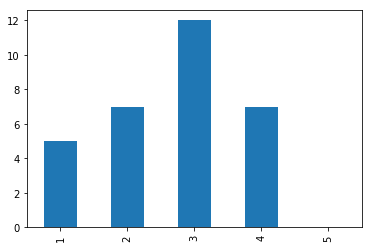

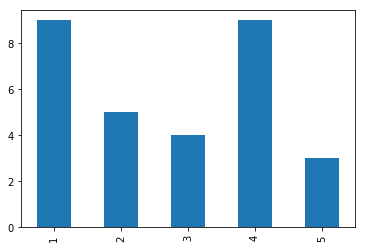

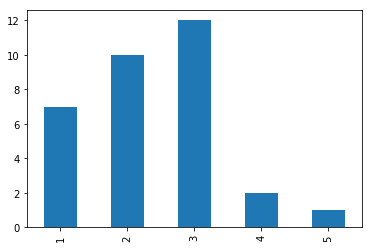

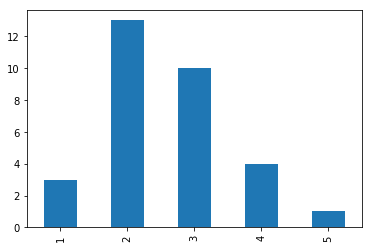

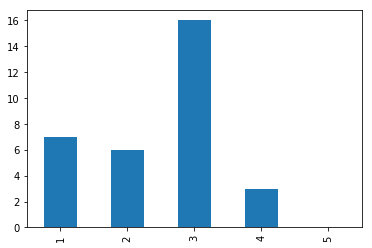

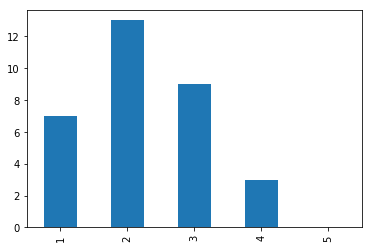

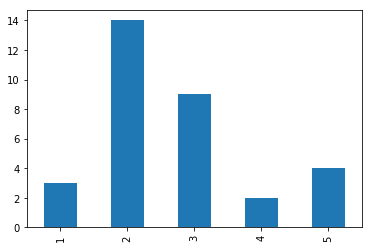

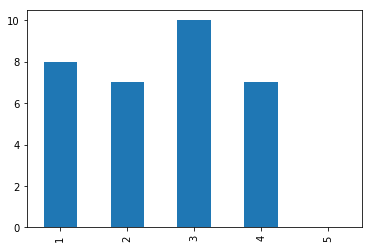

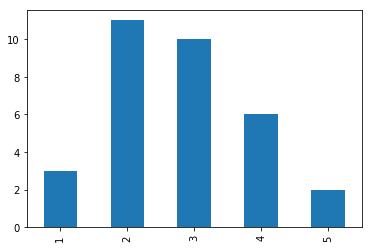

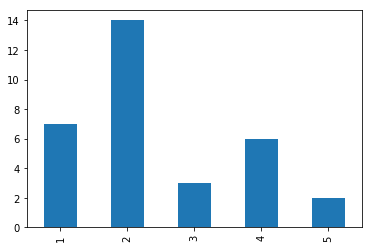

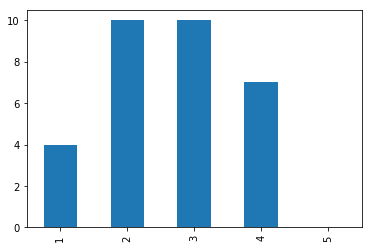

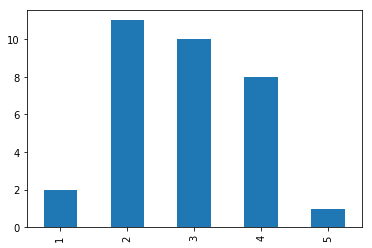

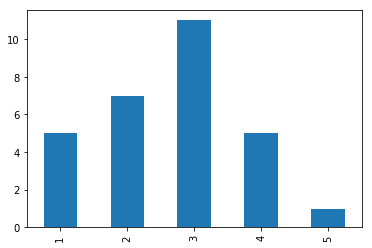

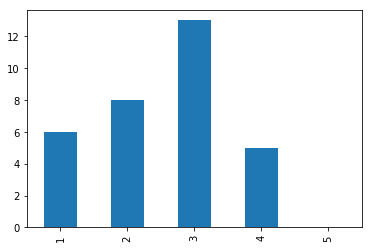

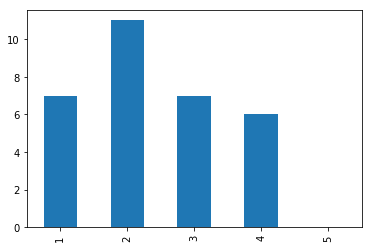

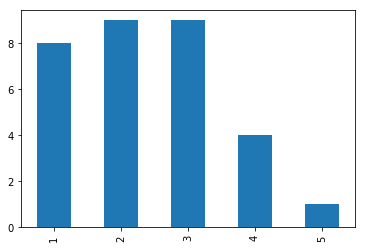

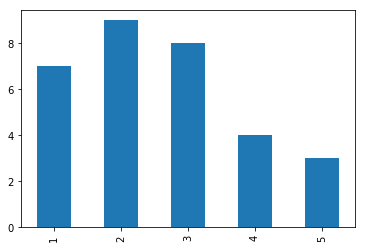

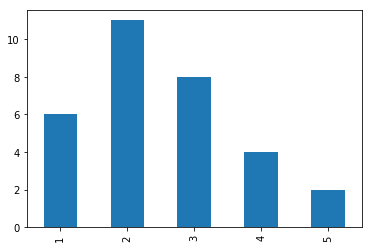

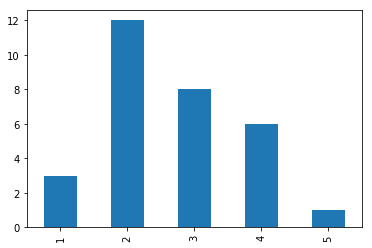

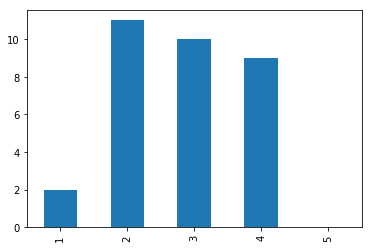

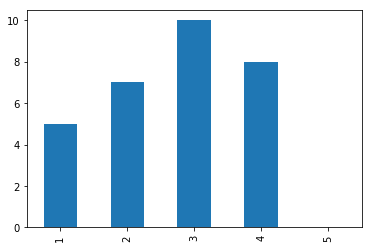

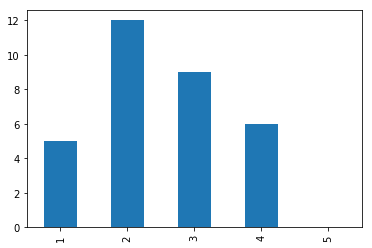

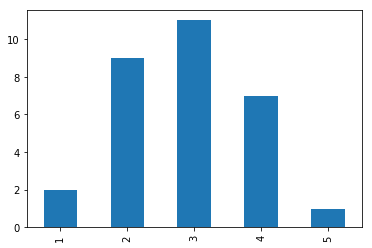

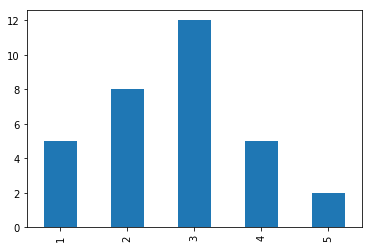

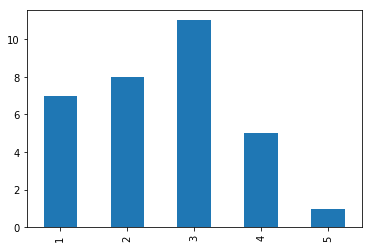

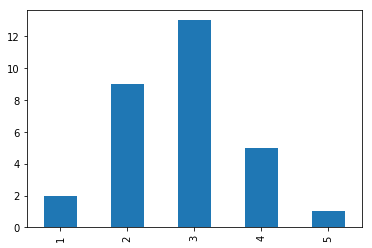

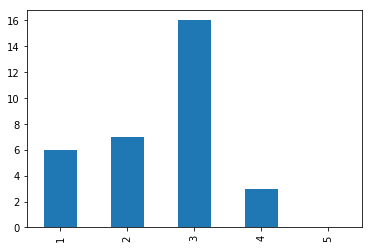

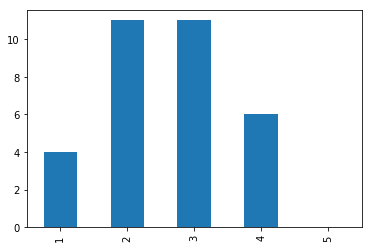

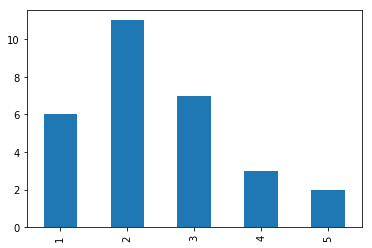

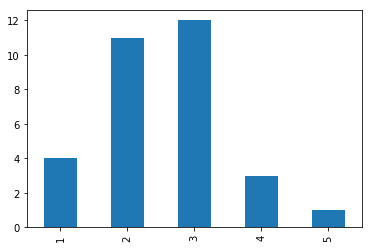

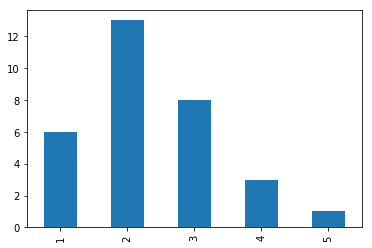

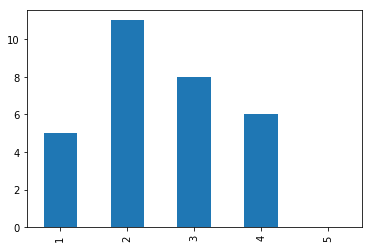

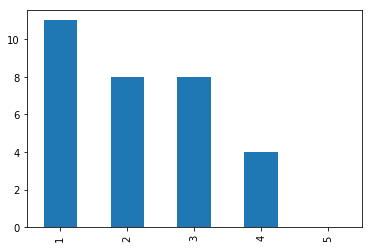

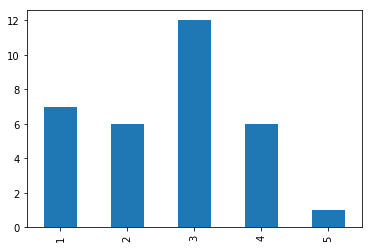

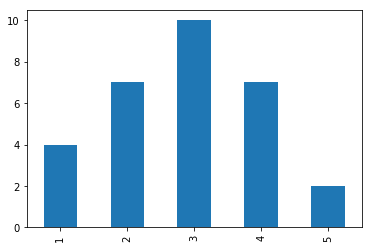

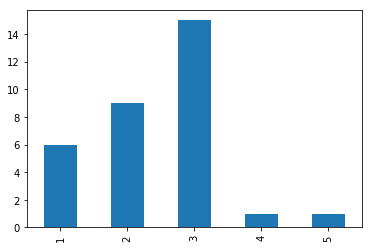

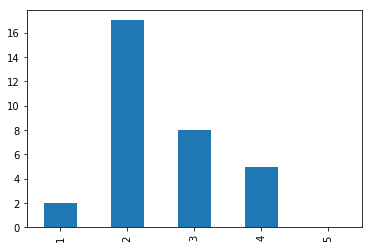

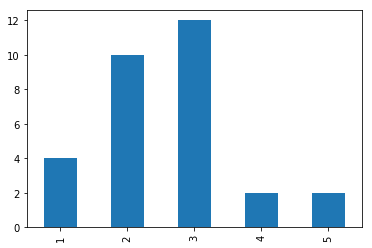

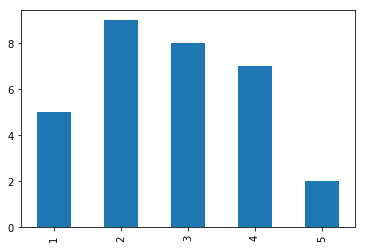

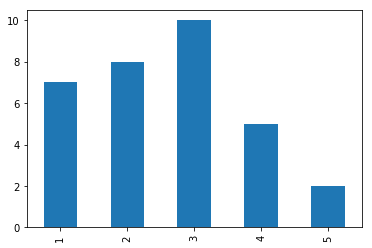

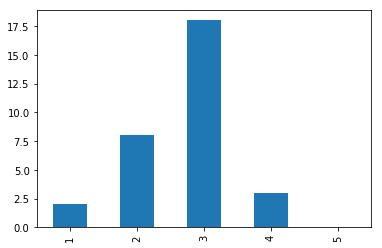

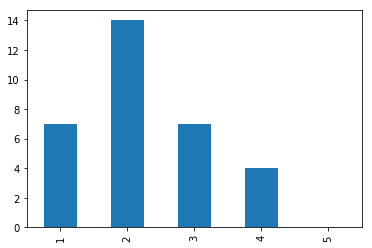

In [24]:
for i in range(len(series.columns)):
    series[series.columns[i]].plot(kind="bar")
    plt.show()